## **Predicting Loan Default Risk: A Data Science Approach for Credit Assessment**

***This project aims to develop a predictive model to assess loan default risk by analyzing repeated loan data from existing clients. Using machine learning techniques, we will train and evaluate different models to predict the likelihood of a loan being flagged as bad_flag. The objective is to identify patterns in borrower behavior, optimize risk assessment, and estimate default rates at varying approval thresholds, providing actionable insights for credit decision-making.***

Relevance of This Project:
- Predictive Modeling & Machine Learning – Develops hands-on experience in building, testing, and optimizing models for real-world applications.
- Financial Risk Analysis – Applies data-driven techniques to assess loan default risk, a key skill in finance, fintech, and risk analytics.
- Business Impact & Decision-Making – Demonstrates the ability to interpret model results and optimize approval thresholds for risk management.
- Advanced Data Processing – Enhances expertise in handling structured financial data, feature engineering, and model evaluation

The **test_task.csv** file contains data on repeated loans from existing clients.

Using this dataset, develop a predictive model to estimate the target variable **bad_flag**. Document your process in a Jupyter Notebook, justifying your model selection and analyzing the expected default rate at various approval thresholds. Clearly explain your approach, methodology, and key insights.

### **0. Data Exploration**

*We will utilize **pandas**, a fundamental Python library for efficiently analyzing and manipulating small to medium-sized datasets.*

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [3]:
# fix a random seed for reproducible results
RANDOM_SEED = 42

In [4]:
# make sure you have the data set on the same path, or change the method argument to point to it
data = pd.read_csv("test_task.csv")

In [5]:
# we have 4157 rows and 22 columns
data.shape

(4157, 22)

In [6]:
# prints a (pseudo-)random sample of 10 rows
data.sample(n=10, random_state=RANDOM_SEED)


,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
2481,798820,2016-11-07,2015-09-07,NaN,NaN,NaN,NaN,7.0,region_3,6,...,16,0,0,0,14.0,550.235369,NaN,43.0,False,0
308,612648,2016-08-18,2016-02-08,NaN,NaN,NaN,NaN,1.0,region_6,12,...,0,2,0,0,6.0,NaN,576.875277,26.0,False,0
2414,452498,2016-04-20,2016-03-12,NaN,NaN,NaN,NaN,0.0,region_2,12,...,0,2,1,0,1.0,561.999471,NaN,28.0,True,1
2720,580963,2016-07-22,2015-08-14,NaN,NaN,NaN,NaN,1.0,region_6,26,...,5,6,0,0,10.0,590.376406,NaN,30.0,False,0
463,518998,2016-06-01,2015-09-29,NaN,NaN,NaN,NaN,1.0,region_3,6,...,8,0,0,0,8.0,593.493342,NaN,47.0,False,0
1185,295047,2015-12-23,2015-12-22,NaN,NaN,NaN,NaN,NaN,region_2,6,...,0,0,0,0,NaN,NaN,NaN,19.0,False,0
96,247067,2015-11-17,2015-10-15,NaN,NaN,NaN,NaN,0.0,region_3,12,...,0,0,0,0,1.0,601.979112,NaN,27.0,False,1
2031,388069,2016-03-16,2015-10-10,NaN,NaN,NaN,NaN,1.0,region_3,6,...,2,0,0,0,3.0,NaN,NaN,24.0,False,0
1886,736698,2016-10-16,2015-10-16,2.0,1.0,0.0,2015-12-20,2.0,region_6,6,...,5,0,0,0,5.0,NaN,NaN,20.0,False,1
843,628262,2016-08-28,2015-08-08,NaN,NaN,NaN,NaN,1.0,region_3,38,...,3,0,0,0,3.0,634.387608,NaN,46.0,False,0


In [7]:
# prints number of non-null values and type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [8]:
# we manually select numerical columns to describe,
# but we intentionally ignore the target variable (bag_flag) and 'key' columns
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


In [9]:
# next, we 'describe' the categorical columns
# note that the output differs between the two calls to `.describe()`
data[[
    "federal_district_nm",
    "gender"
]].describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


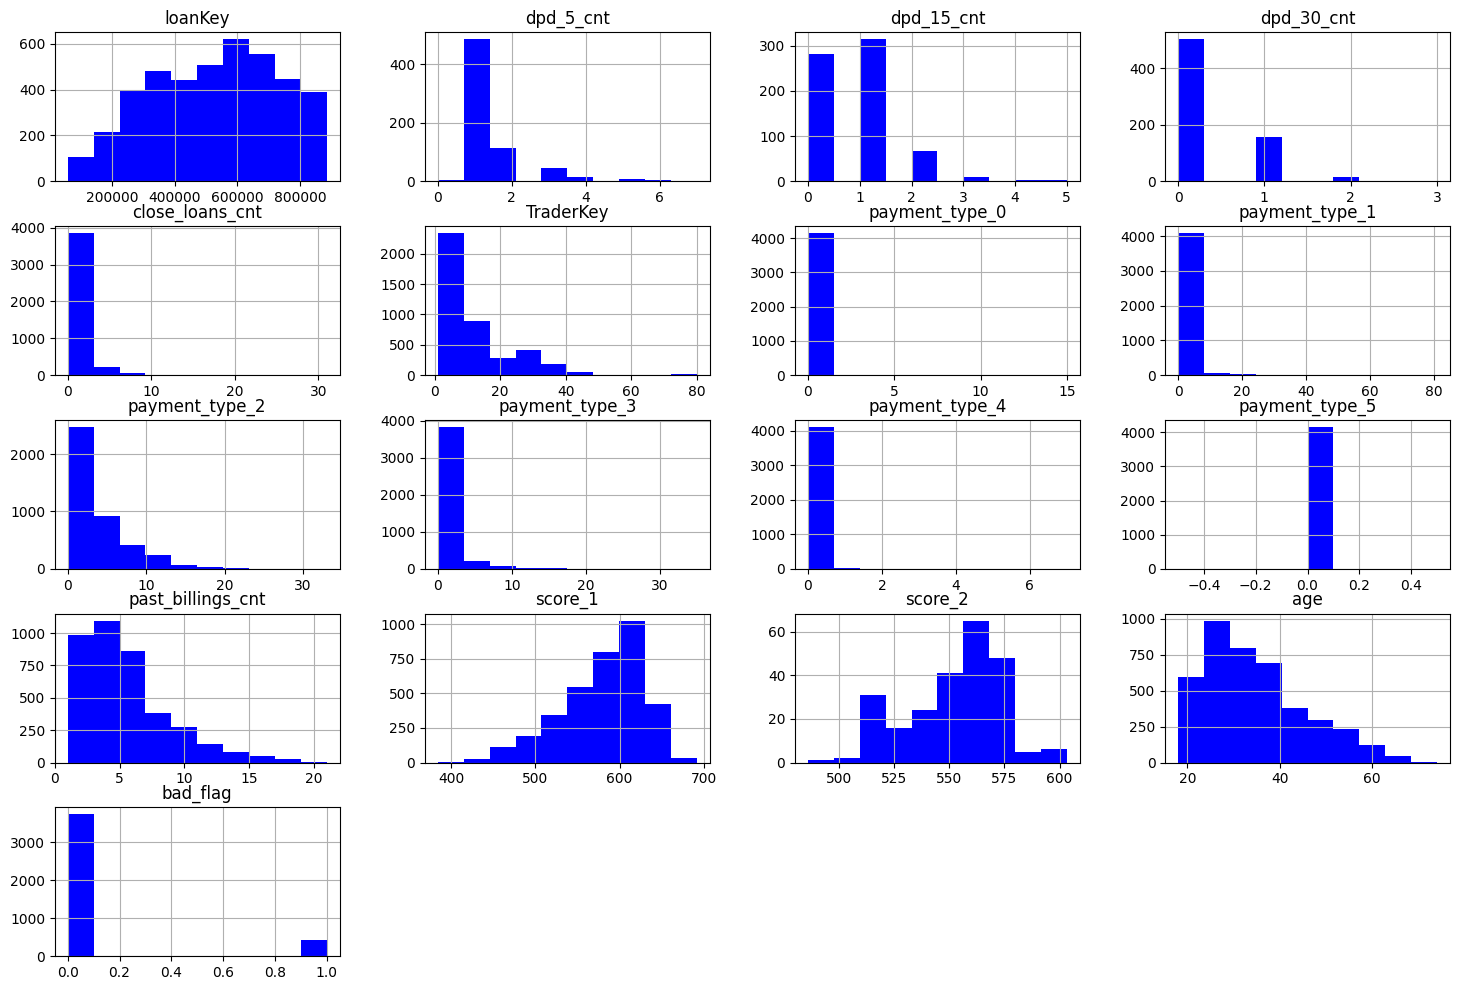

In [11]:
_ = data.hist(figsize=(18, 12), color="blue")

In [12]:
# target variable distribution
data["bad_flag"].value_counts()


bad_flag
0    3740
1     417
Name: count, dtype: int64

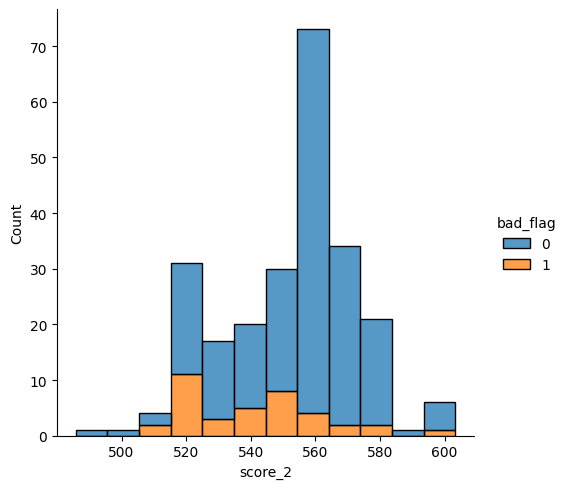

In [13]:
from seaborn import displot

_ = displot(data=data, x="score_2", hue="bad_flag", multiple="stack")


### **1. Feature Engineering**

In [14]:
# calculate difference in days between the first and the repeated loan
data[["rep_loan_date", "first_loan"]] = data[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
data["days_between_rep_and_first_loan"] = (data["rep_loan_date"] - data["first_loan"]).dt.days

In [15]:
data

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,0,0,0,10.0,NaN,NaN,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,0,0,5.0,NaN,NaN,20.0,False,0,180
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,5,0,0,5.0,NaN,NaN,19.0,False,0,314
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,0,0,0,6.0,NaN,NaN,21.0,False,0,365
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,3.0,NaN,NaN,33.0,False,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,...,0,0,0,NaN,NaN,563.089780,26.0,False,0,25
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,3.0,NaN,576.875277,38.0,False,1,148
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,4.0,NaN,554.816921,21.0,False,0,128
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,...,0,0,0,4.0,NaN,563.089780,35.0,False,0,147


Next, we address the categorical variables in our dataset: **gender** and **federal_region**. The **gender** variable can be directly mapped into the model, with **True → 1** and **False → 0**. For **federal_region**, which has **eight unique values**, we can apply **pandas' `get_dummies()` method** to create one-hot encoded (dummy) columns for each category, ensuring the model can process the data effectively.

In [16]:
federal_districts = pd.get_dummies(data["federal_district_nm"], prefix="federal")


In [17]:
federal_districts

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
4152,False,False,False,False,False,True,False,False
4153,False,False,True,False,False,False,False,False
4154,False,False,True,False,False,False,False,False
4155,False,False,False,False,False,False,True,False


In [18]:
data = pd.concat(objs=[data, federal_districts], axis=1)

In [19]:
# since most of the classifiers we're evaluating don't accept NaN values,
# we're replacing them with zeros - a neutral value
data.fillna(value=0, inplace=True)

In [20]:
data.sample(n=7, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
2481,798820,2016-11-07,2015-09-07,0.0,0.0,0.0,0,7.0,region_3,6,...,0,427,False,False,False,True,False,False,False,False
308,612648,2016-08-18,2016-02-08,0.0,0.0,0.0,0,1.0,region_6,12,...,0,192,False,False,False,False,False,False,True,False
2414,452498,2016-04-20,2016-03-12,0.0,0.0,0.0,0,0.0,region_2,12,...,1,39,False,False,True,False,False,False,False,False
2720,580963,2016-07-22,2015-08-14,0.0,0.0,0.0,0,1.0,region_6,26,...,0,343,False,False,False,False,False,False,True,False
463,518998,2016-06-01,2015-09-29,0.0,0.0,0.0,0,1.0,region_3,6,...,0,246,False,False,False,True,False,False,False,False
1185,295047,2015-12-23,2015-12-22,0.0,0.0,0.0,0,0.0,region_2,6,...,0,1,False,False,True,False,False,False,False,False
96,247067,2015-11-17,2015-10-15,0.0,0.0,0.0,0,0.0,region_3,12,...,1,33,False,False,False,True,False,False,False,False


### **2. Algorithm Selection**

This problem is a binary classification task, where we aim to predict whether a customer is classified as "bad". In this section, we will experiment with different classification models from the scikit-learn library.

To evaluate model performance, we will use precision, recall, and F1 score, which are among the most common metrics for assessing classifiers.

In the following cells, we will build multiple classifiers and initially evaluate them based on the F1 score. Later, we will analyze all three metrics in a more visual and intuitive format for better interpretation.









In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [22]:
# define the numerical input columns
X_columns = [
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_rep_and_first_loan",
    "gender"
]

# append to them the categorical ones
X_columns = X_columns + list(federal_districts.columns)

In [23]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

**Note:** At this stage, the **hyperparameters** for the classifiers are set **randomly**. In a later section, we will perform **hyperparameter optimization**, a crucial step in any real-world machine learning project. Fine-tuning hyperparameters significantly improves model performance and is a highly valuable skill—so stay engaged as we progress through this project!

In [24]:
# define the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED)
]

In [25]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.23841059602649006
KNeighborsClassifier : 0.2018348623853211
LogisticRegression : 0.06521739130434782
LogisticRegressionCV : 0.0
BaggingClassifier : 0.12612612612612611
GaussianNB : 0.22459893048128343
RandomForestClassifier : 0.18181818181818182
ExtraTreesClassifier : 0.1568627450980392


Based on the **F1 scores** above, which model demonstrates the best performance, and which one falls short?  

The **Yellowbrick classification report** provides a detailed breakdown of each model’s performance across different classes. Analyze the reports empirically to identify the most effective algorithm and determine which model performs the worst.

In [26]:
from yellowbrick.classifier import ClassificationReport

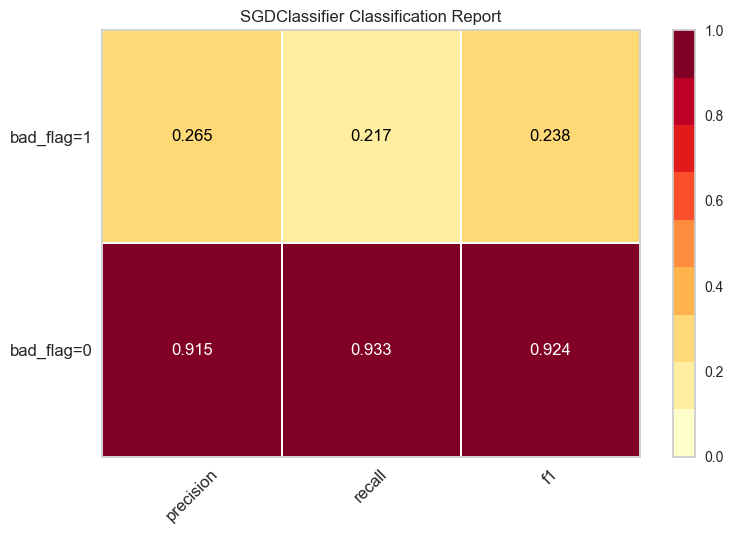

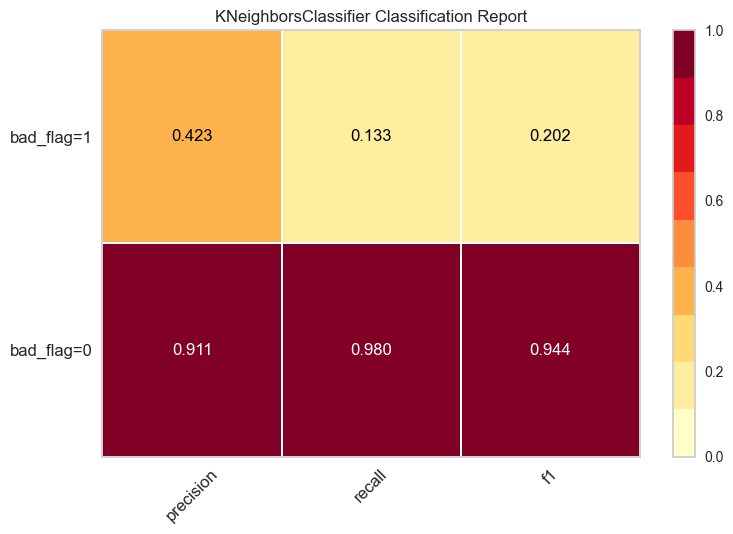

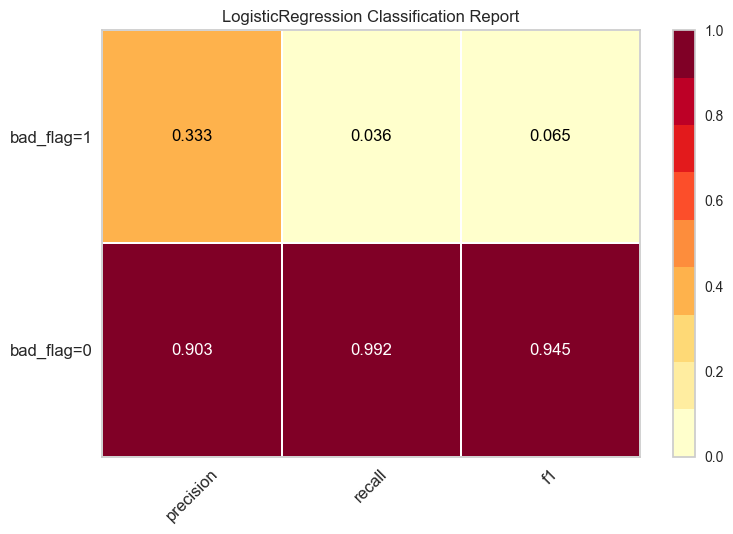

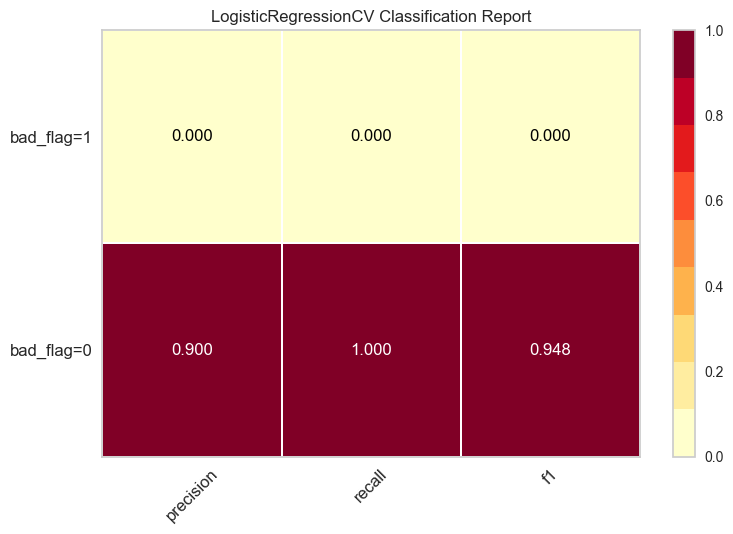

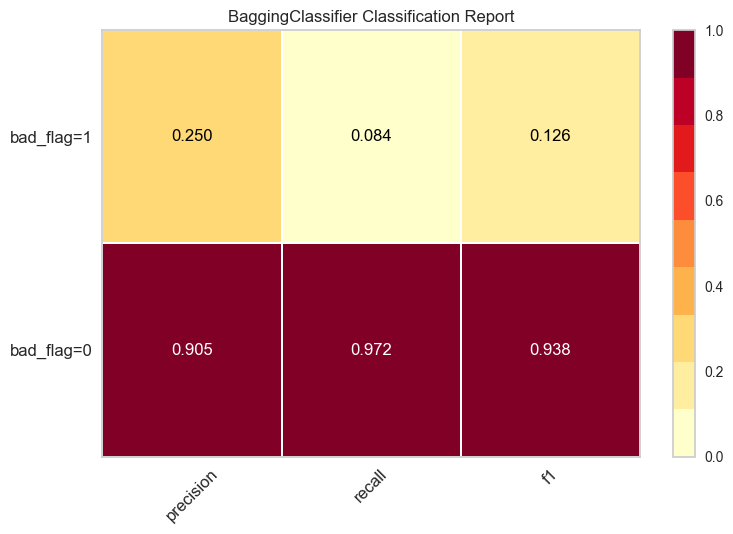

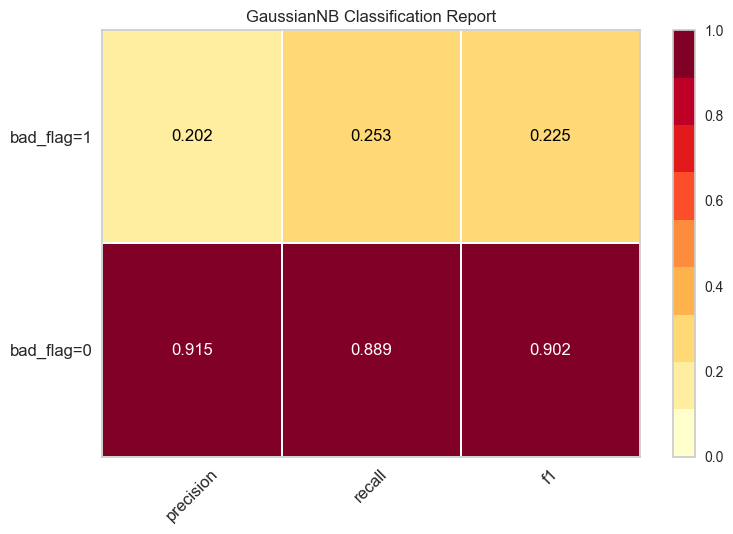

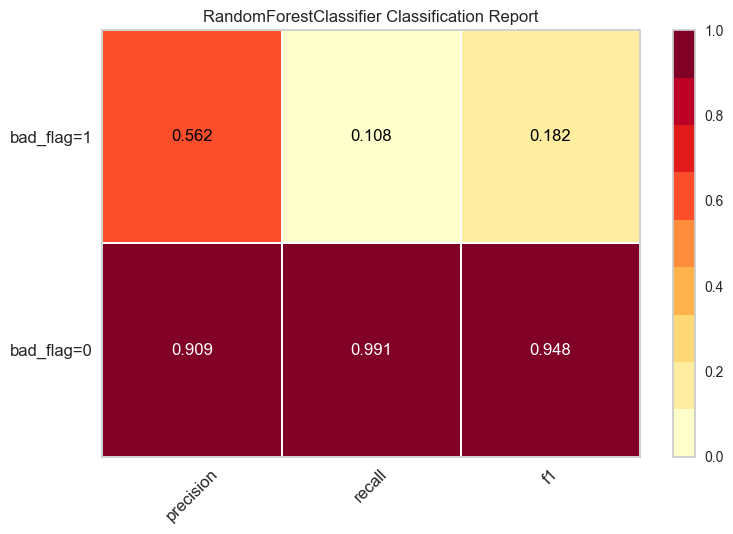

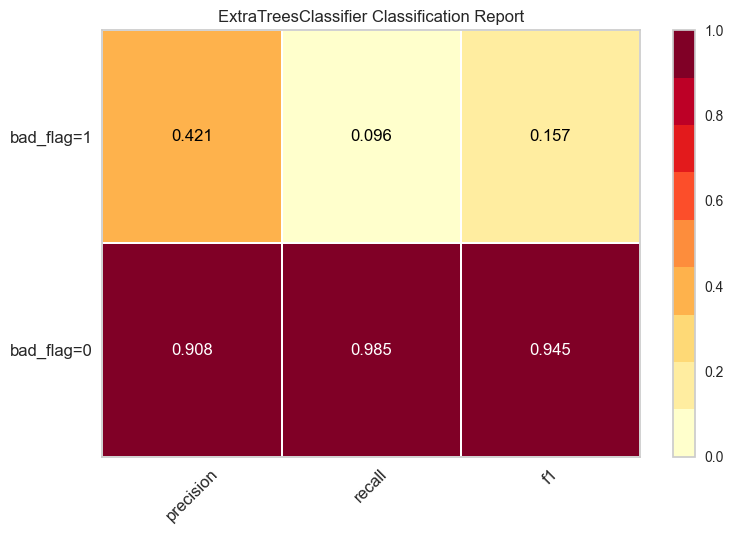

In [27]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

### **3. Addressing Class-Imbalance**

Handling **class imbalance** is a common challenge in machine learning, as most algorithms tend to **overlook or underperform on the minority class**, which is often the most critical. To address this issue, several techniques have been developed, including:  

- **Over-sampling the minority class** – Increasing the number of samples in the underrepresented class.  
- **Under-sampling the majority class** – Reducing the number of samples in the dominant class.  
- **Assigning class weights** – Adjusting the importance of each class during training.  
- **Synthetic data generation (e.g., SMOTE)** – Creating new, realistic data points for the minority class.  

These methods aim to create a **more balanced class distribution**, improving the model's ability to distinguish between classes and ultimately enhancing its performance.  

In this project, we will implement **under-sampling of the majority class**. However, feel free to experiment with other techniques to see if they lead to a better-performing model.

In [28]:
## under-sampling
pos_examples = data["bad_flag"].sum()
neg_examples = data.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

# we keep all positive examples
pos = data[data["bad_flag"] == 1]
# we use pandas' sample method to take randomly 20% of the negative / majority class
neg = data[data["bad_flag"] == 0].sample(frac=0.2, random_state=RANDOM_SEED)

print("Negative examples after under-sampling", neg.shape[0])

# concatenating the positive and sub-sampled negative examples
data = pd.concat(objs=[pos, neg])

print("Final data shape", data.shape)

Positive examples 417 , negative examples 3740
Negative examples after under-sampling 748
Final data shape (1165, 31)


In [29]:
# perform another train / test split with the new sampled data
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

In [30]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.5253164556962026
KNeighborsClassifier : 0.6211180124223602
LogisticRegression : 0.4496124031007752
LogisticRegressionCV : 0.4892086330935252
BaggingClassifier : 0.5769230769230769
GaussianNB : 0.42953020134228187
RandomForestClassifier : 0.5974025974025974
ExtraTreesClassifier : 0.5789473684210527


In [31]:
#All classifiers seem to have improved performance, with the KNeighbors classifier reaching an F1 score of 0.62! Let's visualize also the confusion matrices.

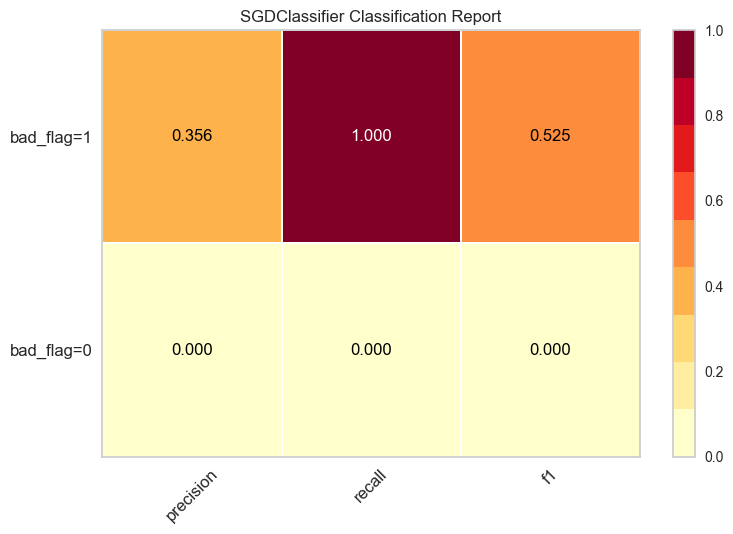

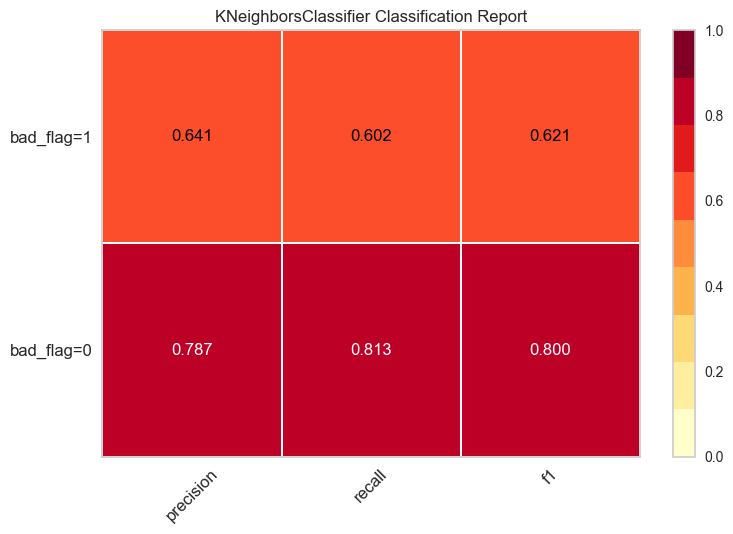

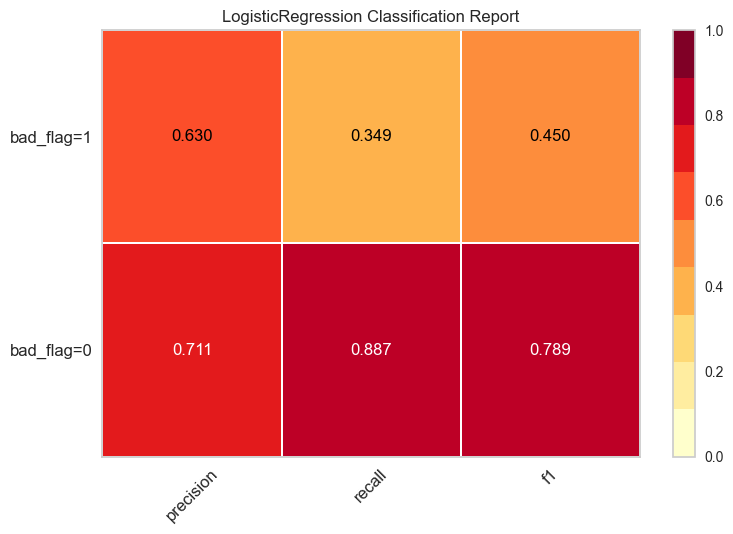

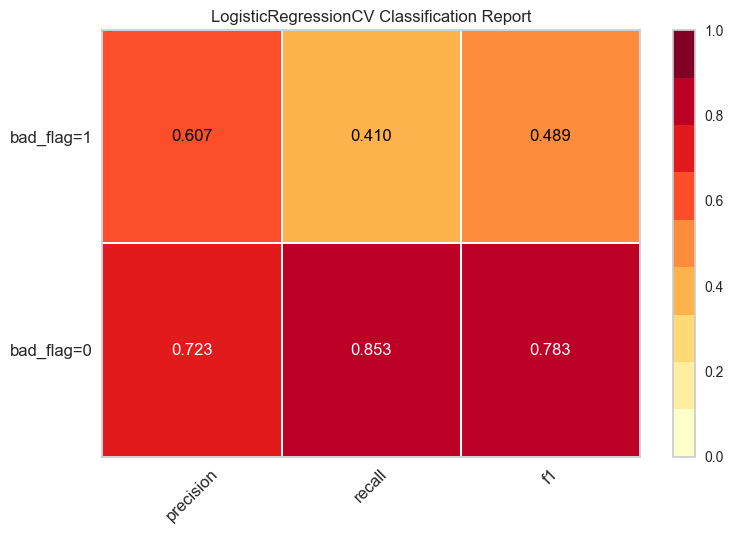

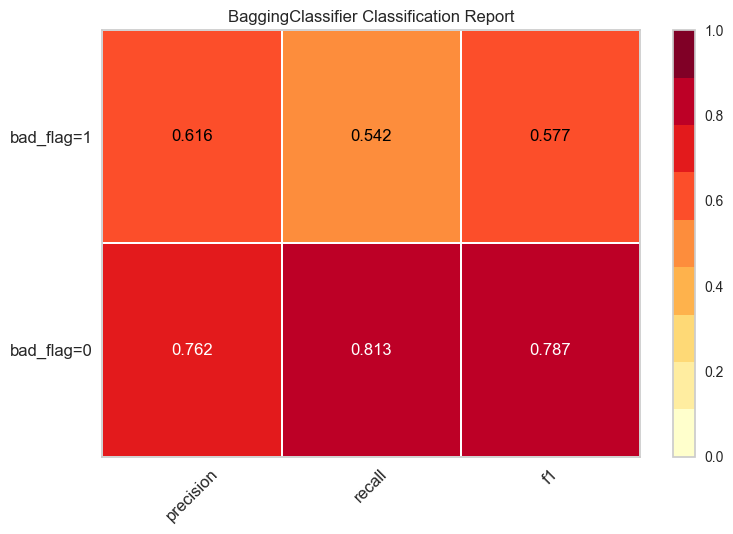

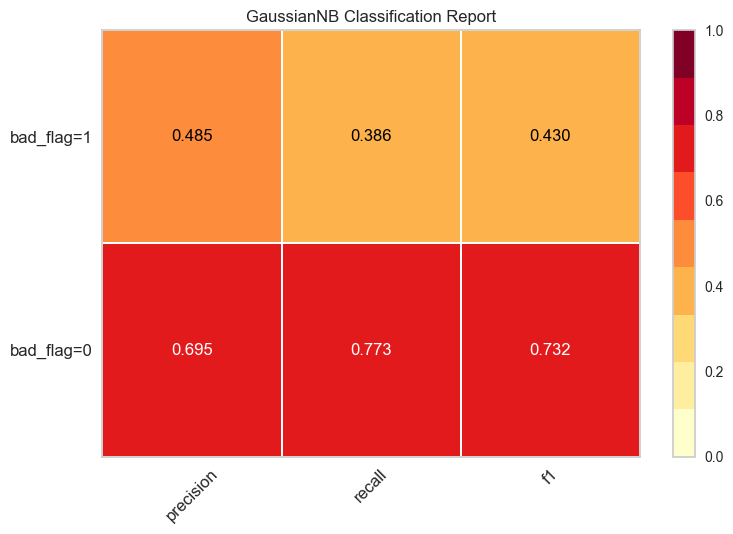

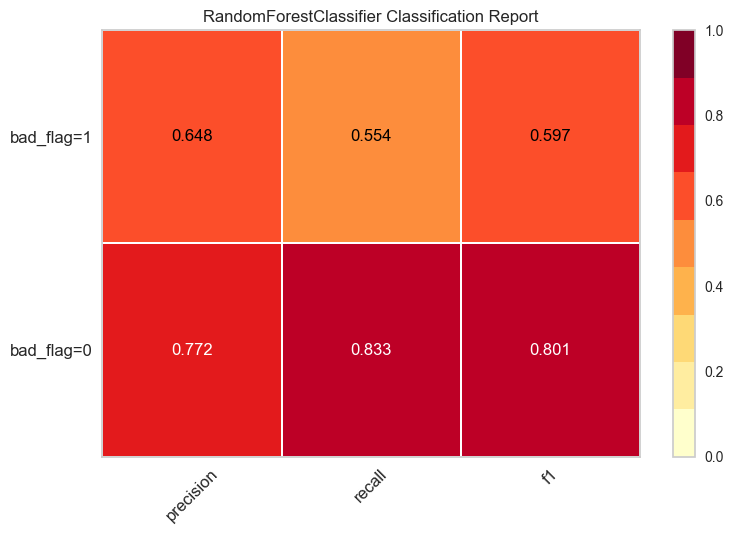

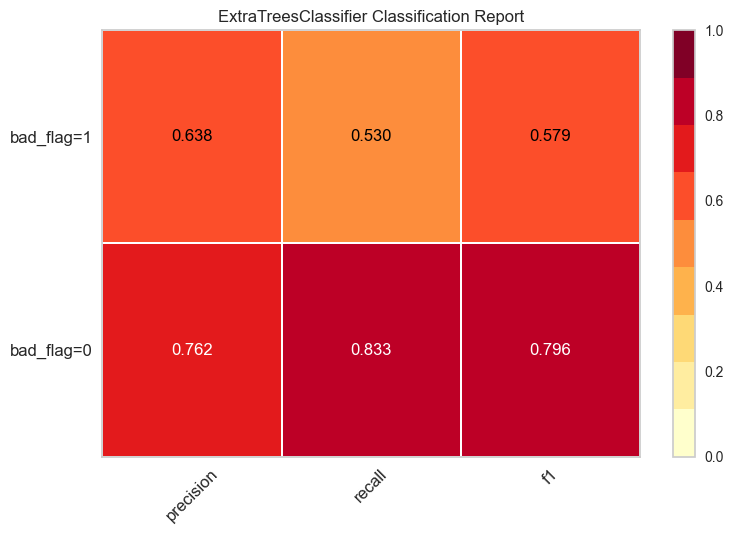

In [32]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

### **4. Hyperparameter Optimization for Model Performance**

After analyzing the classification reports, we have determined that the **KNeighbors classifier** demonstrates the best overall performance.

While all models perform similarly on the negative (majority) class, KNeighbors achieves the highest F1 score for the positive (minority) class, making it the most effective model in this case.

Optimizing the KNeighbors Classifier
In this section, we will attempt to further enhance the model by fine-tuning its hyperparameters. We will use the Optuna framework, a powerful tool for automated hyperparameter optimization.

Effective hyperparameter selection requires a deep understanding of how an algorithm functions. For our KNeighbors classifier, we will experiment with:

- Number of neighbors – Determines how many points influence classification.
- Weight function – Defines how the influence of neighbors is distributed.
- Algorithm for computing nearest neighbors – Affects model efficiency and accuracy.

In [34]:
import optuna

In [35]:
def objective(trial: optuna.Trial):
    """The objective function that we will try to maximize."""
    # suggest min. and max. values for the parameters that we want to tune
    n_neighbors = trial.suggest_int(name="n_neighbors", low=1, high=10)
    weights = trial.suggest_categorical(name="weights", choices=["uniform", "distance"])
    algorithm = trial.suggest_categorical(name="algorithm", choices=["ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int(name="leaf_size", low=1, high=40)
    p = trial.suggest_categorical(name="p", choices=[1, 2])

    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

    classifier = classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    return f1_score(y_true=y_test, y_pred=y_pred)

In [36]:
# make the sampler behave in a deterministic way.
sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction='maximize', study_name="KNeigbors", sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2025-02-24 13:50:23,353] A new study created in memory with name: KNeigbors
[I 2025-02-24 13:50:23,402] Trial 0 finished with value: 0.5594405594405595 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 3, 'p': 1}. Best is trial 0 with value: 0.5594405594405595.
[I 2025-02-24 13:50:23,424] Trial 1 finished with value: 0.5974025974025974 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 8, 'p': 2}. Best is trial 1 with value: 0.5974025974025974.
[I 2025-02-24 13:50:23,446] Trial 2 finished with value: 0.625 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 19, 'p': 1}. Best is trial 2 with value: 0.625.
[I 2025-02-24 13:50:23,486] Trial 3 finished with value: 0.5594405594405595 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 38, 'p': 1}. Best is trial 2 with value: 0.625.
[I 2025-02-24 13:50:23,515] Tria

In [37]:
study.best_params

{'n_neighbors': 5,
 'weights': 'distance',
 'algorithm': 'brute',
 'leaf_size': 19,
 'p': 1}

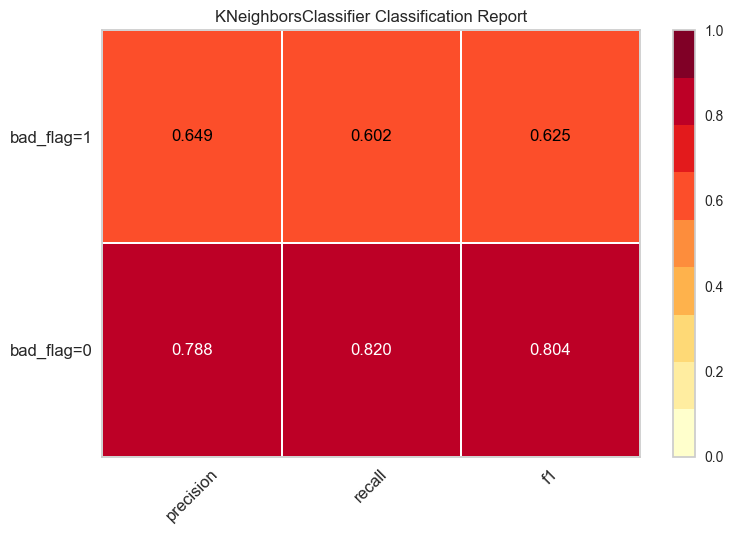

In [38]:
visualizer = ClassificationReport(KNeighborsClassifier(**study.best_params), classes=["bad_flag=0", "bad_flag=1"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
_ = visualizer.show()

The **AUC (Area Under the Curve)** metric is a widely used and universal measure for classification problems. It represents the **trade-off between the true positive rate (TPR) and the false positive rate (FPR)**, providing insight into a model’s ability to distinguish between classes.  

To visualize this, we plot the **ROC (Receiver Operating Characteristic) curve** by **sorting the predicted probabilities in descending order** and plotting the **false positive rate against the true positive rate** at various threshold levels. This allows us to estimate, at any given point on the curve, how many true and false positives the model would predict.